**CUSTOMER CHURN PREDICTION:**

I have to Develop a model to predict customer churn for a subscription based
service or business. We will use historical customer data, including features like
usage behavior and customer demographics, and we will try algorithms like
Logistic Regression, Random Forests, or Gradient Boosting to predict
churn.

#**Including all requred libraries**





In [91]:
# Importing the necessary libraries for data handling, visualization, preprocessing, modeling, and evaluation
import pandas as pd  # Library for data manipulation and analysis
import seaborn as sns  # Library for statistical data visualization
import matplotlib.pyplot as plt  # Library for plotting graphs
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For preprocessing data
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For random forest and gradient boosting models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation metrics
import joblib  # For saving the trained model

# The above imports essential libraries required for various stages of the customer churn prediction project.
# Pandas is used for data manipulation, Seaborn and Matplotlib for data visualization,
# Sklearn modules for preprocessing, model selection, tuning, and evaluation,
# and Joblib for saving the final trained model.


#**Loading and Exploring the Data**

In [92]:
# I have uploaded the dataset on github now i will fetch data from github by url , this is the URL for the dataset
url = "https://raw.githubusercontent.com/AbhishekYadav-01/Encryptix/main/CUSTOMER%20CHURN%20PREDICTION/Churn_Modelling.csv"

# Loading the dataset into a Pandas DataFrame
data = pd.read_csv(url)

# Displayong the first five rows of the dataset to understand its structure and contents
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
# Displaying basic statistics
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [94]:

# Checking if their any missing values in the dataset

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#**Data Visualization**

**Distribution of Churn**

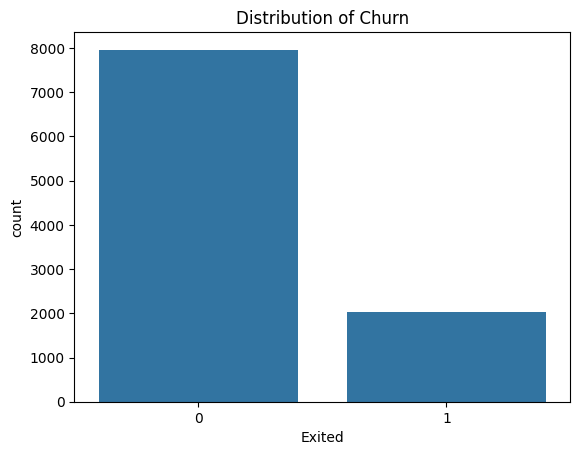

In [95]:
# Distribution of Churn
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churn')
plt.show()


**Gender Distribution**

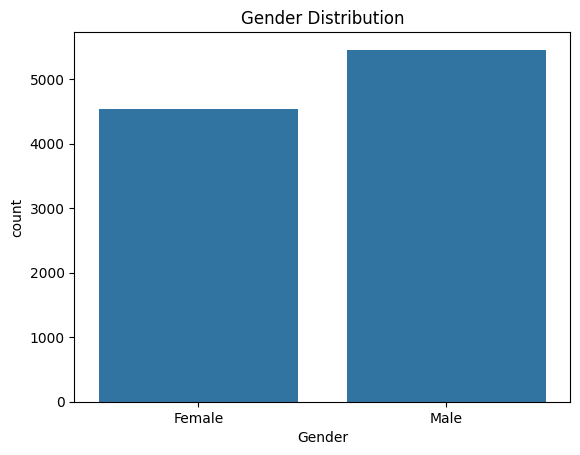

In [96]:
# Gender Distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()


**Age Distribution**


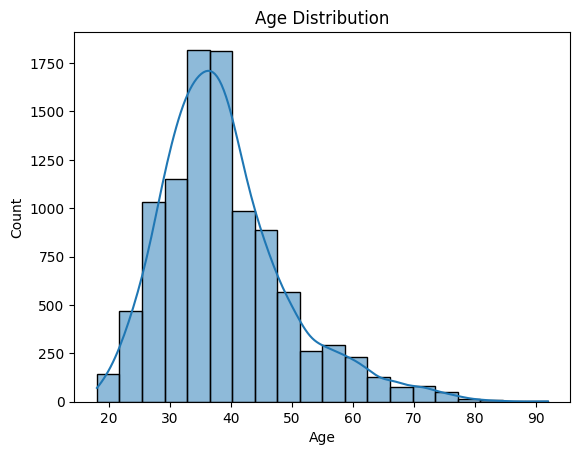

In [97]:
# Age Distribution
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


**Credit Score vs Churn**


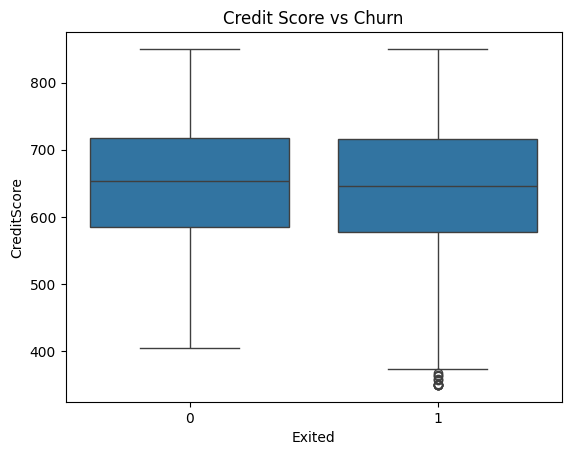

In [98]:
# Credit Score vs Churn
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Credit Score vs Churn')
plt.show()


**Geography vs Churn**

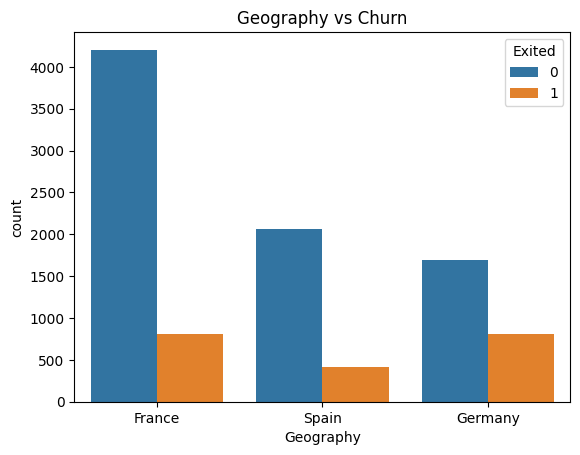

In [99]:
# Geography vs Churn
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Geography vs Churn')
plt.show()


#**Preprocessing of the Data**

In [100]:
############# Now i will encode categorical variables and drop unnecessary columns (RowNumber, CustomerId, Surname, and Exited)  ###############


# Initializing LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# Encoding 'Geography' and 'Gender' columns into numerical labels
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Separate features (X) and target variable (y)
# Drop unnecessary columns (RowNumber, CustomerId, Surname, and Exited) from features
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

# Initializing StandardScaler for scaling numerical features
scaler = StandardScaler()

# Scaling the numerical features in X and store them in X_scaled
X_scaled = scaler.fit_transform(X)


In [101]:
# Creating a new feature 'BalancePerProduct' by dividing 'Balance' by 'NumOfProducts'
data['BalancePerProduct'] = data['Balance'] / data['NumOfProducts']

# Updating features (X) by dropping unnecessary columns (RowNumber, CustomerId, Surname, and Exited)
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])

# Scaling the updated features in X and store them in X_scaled using StandardScaler
X_scaled = scaler.fit_transform(X)


#**Model Selection and Training**

In [102]:
# Splitting the scaled data into training and test sets
# Test set will be 25% of the total data, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=25)

# Initializing the logistic regression model
log_reg = LogisticRegression()

# Initializing the random forest classifier model
random_forest = RandomForestClassifier()

# Initializing the gradient boosting classifier model
gradient_boosting = GradientBoostingClassifier()

# Train the logistic regression model using the training data
log_reg.fit(X_train, y_train)

# Train the random forest classifier model using the training data
random_forest.fit(X_train, y_train)

# Train the gradient boosting classifier model using the training data
gradient_boosting.fit(X_train, y_train)


GradientBoostingClassifier()

#**Model Evaluation**

**Some Actual vs Predicted churn status**

In [103]:
# Predict churn status using all models on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

# Create DataFrames to display actual vs predicted values for each model
actual_vs_predicted_log_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log_reg})
actual_vs_predicted_random_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_random_forest})
actual_vs_predicted_gradient_boosting = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gradient_boosting})

# Display the first few rows for the logistic regression model
print("Logistic Regression - some Actual vs Predicted churn status :")
print(actual_vs_predicted_log_reg.head(10))


Logistic Regression - some Actual vs Predicted churn status :
      Actual  Predicted
3555       1          0
4078       0          0
8445       0          0
5939       0          0
5583       0          0
1656       0          0
5550       0          0
1736       0          0
6297       0          0
6364       0          0


In [104]:
print("\nRandom Forest - some Actual vs Predicted churn status :")
print(actual_vs_predicted_random_forest.head(10))



Random Forest - some Actual vs Predicted churn status :
      Actual  Predicted
3555       1          0
4078       0          0
8445       0          0
5939       0          0
5583       0          0
1656       0          0
5550       0          0
1736       0          0
6297       0          0
6364       0          0


In [105]:
print("\nGradient Boosting - some Actual vs Predicted churn status :")
print(actual_vs_predicted_gradient_boosting.head(10))


Gradient Boosting - some Actual vs Predicted churn status :
      Actual  Predicted
3555       1          0
4078       0          0
8445       0          0
5939       0          0
5583       0          0
1656       0          0
5550       0          0
1736       0          0
6297       0          0
6364       0          0


**Accuracies of models**

In [106]:
# Evaluate the models by calculating accuracy scores
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)

# Print the accuracy scores for each model
print(f"We got Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"We got Random Forest Accuracy: {accuracy_random_forest}")
print(f"We got Gradient Boosting Accuracy: {accuracy_gradient_boosting}")


We got Logistic Regression Accuracy: 0.8124
We got Random Forest Accuracy: 0.8644
We got Gradient Boosting Accuracy: 0.8712


**Confusion Matrices for all models**

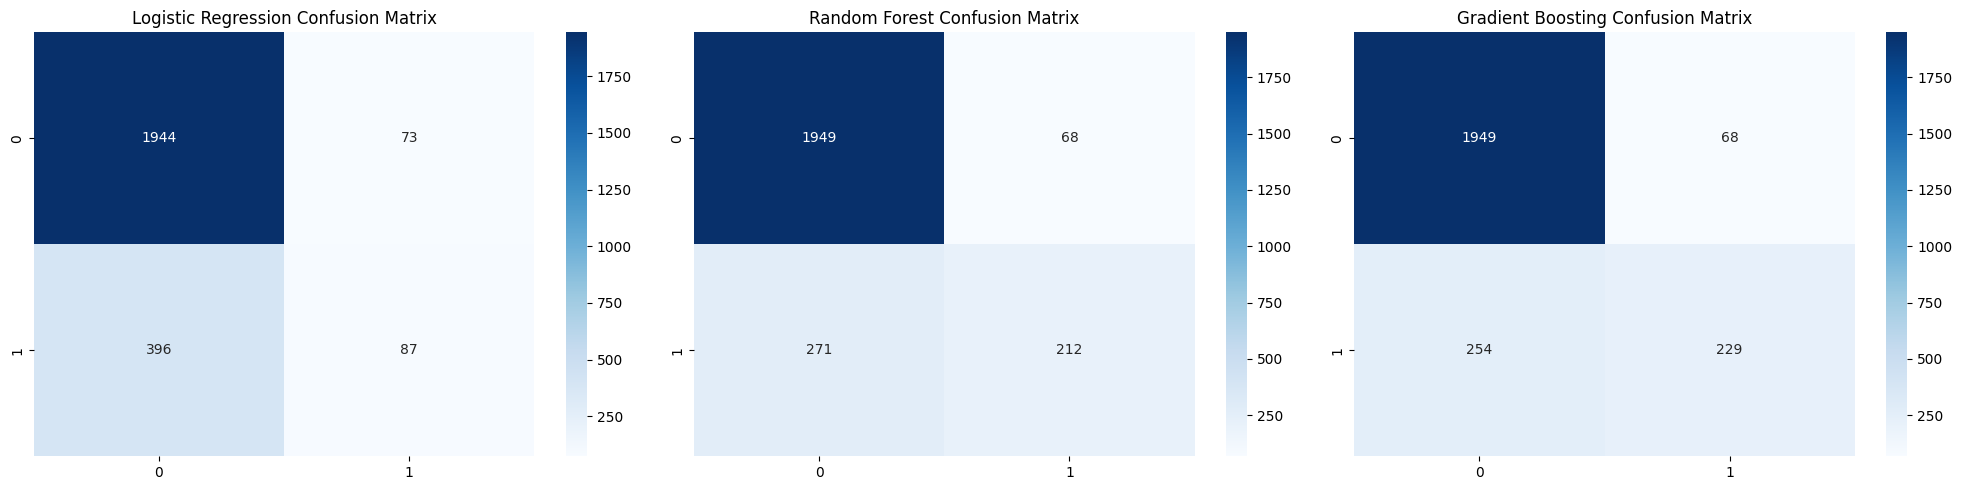

In [107]:
# Create subplots for confusion matrices of all models
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')

# Plot confusion matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(confusion_matrix(y_test, y_pred_gradient_boosting), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Gradient Boosting Confusion Matrix')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Classification Reports of all models**


In [108]:
# Classification Reports
print("We got Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))




We got Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2017
           1       0.54      0.18      0.27       483

    accuracy                           0.81      2500
   macro avg       0.69      0.57      0.58      2500
weighted avg       0.78      0.81      0.77      2500



In [109]:
print("We got Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))



We got Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2017
           1       0.76      0.44      0.56       483

    accuracy                           0.86      2500
   macro avg       0.82      0.70      0.74      2500
weighted avg       0.85      0.86      0.85      2500



In [110]:
print("We got Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gradient_boosting))

We got Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2017
           1       0.77      0.47      0.59       483

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



#**Saving the best Model for future use**

In [111]:
 # Saving the best model (Best Accuracy 80 % ) gradient_boosting model for future use
joblib.dump(gradient_boosting, 'best_model.pkl')


['best_model.pkl']